`Created by - Ayushi Dubey`

**Task T2 Model reproducibility:** can we reproduce the exact values / a figure / that authors obtained when training the model in the first place? This means we need to read the publication and identify for example a compound identified using that model and check that we obtain the same values.

**Task Description:**

1. Read the [scientific publication](https://acrobat.adobe.com/id/urn:aaid:sc:ap:3cca2c36-6b4f-478a-996c-7f77423e819e?viewer%21megaVerb=group-discover) and identify a result you could reproduce from the paper. Hint: explain in your GitHub issue for which dataset are you going to reproduce the results given in the publication.

2. Try to implement the model as described by the authors (not from the Ersilia Model Hub) and reproduce the results selected from the paper. Make sure to include the results evaluation in your repository.

3. Check that the model provides the same results when running via the Ersilia Model Hub.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Preparing the data

The authors have provided `Table S6.xlsx` as the supporting information in the publication (present in the `../data` folder). It contains the detailed prediction results for 1,824 FDA-approved small molecule drugs available from the DrugBank database.

So, we create a dataframe containing the names and SMILES values of the molecules from the provided dataset. Then we compare our predicted results with the ones predicted by the authors.

` For convenience, we will be using the term 'publication data' for the data predicted by the authors, and the term 'predicted data' for the predictions made using the model from Ersilia Model Hub on the same data used by the authors. `

## Exploring the data given in the publication

In [2]:
df_publication = pd.read_excel('../data/Table S6.xlsx')

In [3]:
df_publication.head()

,"Table S6. Detailed predictions for 1,824 approved drugs by deephERG",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
1,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
2,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
3,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
4,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0


In [4]:
# Set the first row as column names
df_publication.columns = df_publication.iloc[0]

# Drop the first row (since it's now the column names)
df_publication = df_publication.drop(0)

# Reset the index
df_publication = df_publication.reset_index(drop=True)

# Display the DataFrame with updated column names
df_publication.head()

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0


In [5]:
df_publication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DrugBank ID                     1824 non-null   object
 1   Smiles                          1824 non-null   object
 2   Name                            1824 non-null   object
 3   Predicted negative probability  1823 non-null   object
 4   Predicted positive probability  1823 non-null   object
 5   Predicted classification        1824 non-null   object
dtypes: object(6)
memory usage: 85.6+ KB


In [6]:
df_publication.describe()

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
count,1824,1824,1824,1823.0,1823.0,1824
unique,1824,1820,1824,1766.0,1791.0,2
top,DB11581,O([C@]([C@@H](CN(C)C)C)(Cc1ccccc1)c1ccccc1)C(=...,Venetoclax,1.0,1.0,0
freq,1,2,1,22.0,20.0,1284


## Number of blockers and non-blockers in the publication dataset

In [7]:
# Calculate classification counts
publication_classification_counts = df_publication['Predicted classification'].value_counts()

# Calculate percentage of classification counts
total_count = publication_classification_counts.sum()
percentage = (publication_classification_counts / total_count) * 100

# Create PrettyTable
publication_table = PrettyTable()
publication_table.field_names = ['Blockers', 'Number', 'Percentage']

# Add rows to the table
publication_table.add_row(['Yes', publication_classification_counts[1], f"{percentage[1]:.2f}%"])
publication_table.add_row(['No', publication_classification_counts[0], f"{percentage[0]:.2f}%"])

# Print the table
print(publication_table)

+----------+--------+------------+
| Blockers | Number | Percentage |
+----------+--------+------------+
|   Yes    |  540   |   29.61%   |
|    No    |  1284  |   70.39%   |
+----------+--------+------------+


```As mentioned by the authors in the publication, the percentage of hERG blockers in the FDA approved dataset of 1824 small molecule drugs is 29.6%. Thus, we have recreated the value that we are to reproduce. ```

Now, we will go ahead and find the predictions using Ersilia Model Hub and check whether we are able to reproduce the publication predictions.

## Creating new dataset with Name and Smiles of publication data

In [8]:
# Select only the 'Name' and 'Smiles' columns
new_df = df_publication[['Name', 'Smiles']]

# Define the file path to save the CSV dataset
file_path = '../data/input_task2.csv'

# Save the new DataFrame as a CSV dataset
new_df.to_csv(file_path, index=False)

# Display the new DataFrame
new_df.head()

,Name,Smiles
0,Venetoclax,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...
1,Grazoprevir,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...
2,Elbasvir,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...
3,Lesinurad,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1
4,Cefroxadine,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...


This dataframe is saved as a csv file named input_task2.csv and the model on Ersilia Model Hub is run on this input data.

# Running the model on Ersilia Model Hub with the publication data

The model is run on the terminal on the input data using the following commands:
```
ersilia -v fetch eos30gr
ersilia serve eos30gr
ersilia -v api run -i input_task2.csv -o output_task2.csv
```
The output after running the model is saved in `output_task2.csv` file which is present the `data` directory.

# Exploring the predicted data

## Loading the predicted data

In [9]:
df_predicted = pd.read_csv('../data/output_task2.csv')
df_predicted.head()

,key,input,activity10
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,0.440594
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,0.333498
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,0.351485
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,0.329208
4,RDMOROXKXONCAL-UEKVPHQBSA-N,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,0.121040


## Renaming the columns to match the publication data

In [10]:
new_columns = ['Inchi_key', 'Smiles', 'Predicted positive probability']
df_predicted.columns =  new_columns
df_predicted.head()

,Inchi_key,Smiles,Predicted positive probability
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,0.440594
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,0.333498
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,0.351485
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,0.329208
4,RDMOROXKXONCAL-UEKVPHQBSA-N,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,0.121040


In [11]:
df_predicted.columns

Index(['Inchi_key', 'Smiles', 'Predicted positive probability'], dtype='object')

## Adding the columns 'Name' and 'DrugBank ID' to predicted data

In [12]:
df_predicted = pd.merge(df_predicted, df_publication[['DrugBank ID', 'Name']], left_index=True, right_index=True)
#dropping inchi key from prediction data
df_predicted.drop('Inchi_key', axis = 1, inplace = True)
#rearranging columns
column_order = ['DrugBank ID', 'Smiles', 'Name', 'Predicted positive probability']
df_predicted = df_predicted[column_order]
df_predicted.head()

,DrugBank ID,Smiles,Name,Predicted positive probability
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.440594
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.333498
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.351485
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.329208
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.121040


## Finding predicted negative probability

In [13]:
df_predicted['Predicted negative probability'] = 1 - df_predicted['Predicted positive probability']
df_predicted.head()

,DrugBank ID,Smiles,Name,Predicted positive probability,Predicted negative probability
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.440594,0.559406
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.333498,0.666502
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.351485,0.648515
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.329208,0.670792
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.121040,0.878960


## Finding the classification of molecules on the basis of predicted positive probabilites

In [14]:
df_predicted['Predicted classification'] = np.where(df_predicted['Predicted positive probability'] >= 0.5, 1, 0)
df_predicted.head()

,DrugBank ID,Smiles,Name,Predicted positive probability,Predicted negative probability,Predicted classification
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.440594,0.559406,0
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.333498,0.666502,0
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.351485,0.648515,0
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.329208,0.670792,0
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.121040,0.878960,0


## Number of blockers and non-blockers in the prediction dataset

In [15]:
# Calculate classification counts
prediction_classification_counts = df_predicted['Predicted classification'].value_counts()

# Calculate percentage of classification counts
total_count = prediction_classification_counts.sum()
percentage = (prediction_classification_counts / total_count) * 100

# Create PrettyTable
prediction_table = PrettyTable()
prediction_table.field_names = ['Blockers', 'Number', 'Percentage']

# Add rows to the table
prediction_table.add_row(['Yes', prediction_classification_counts[1], f"{percentage[1]:.2f}%"])
prediction_table.add_row(['No', prediction_classification_counts[0], f"{percentage[0]:.2f}%"])

# Print the table
print(prediction_table)

+----------+--------+------------+
| Blockers | Number | Percentage |
+----------+--------+------------+
|   Yes    |  413   |   22.64%   |
|    No    |  1411  |   77.36%   |
+----------+--------+------------+


Here, we see that the percentage of hERG blockers predicted using Ersilia Model Hub, i.e., 22.64% differs from the percentage given by the authors, i.e., 29.6%.

Thus, we will now find for how many molecules is the prediction differing.

# Finding differing classifications

In [16]:
# Merge the dataframes on 'Smiles' to align the classification values
merged_df = df_predicted.merge(df_publication[['Smiles', 'Predicted classification']], on='Smiles', suffixes=('_predicted', '_publication'))

# Count the number of molecules where the classification values are different
different_classification_count = (merged_df['Predicted classification_predicted'] != merged_df['Predicted classification_publication']).sum()

total_molecules = len(df_predicted)
percentage_different_classification = (different_classification_count / total_molecules) * 100

print("Number of molecules with different classification values:", different_classification_count)
print("Percentage of molecules with different classification values: {:.2f}%".format(percentage_different_classification))

Number of molecules with different classification values: 301
Percentage of molecules with different classification values: 16.50%


# Comparing the original implementation vs the EMH result

## Comparison of predicted positive probabilities

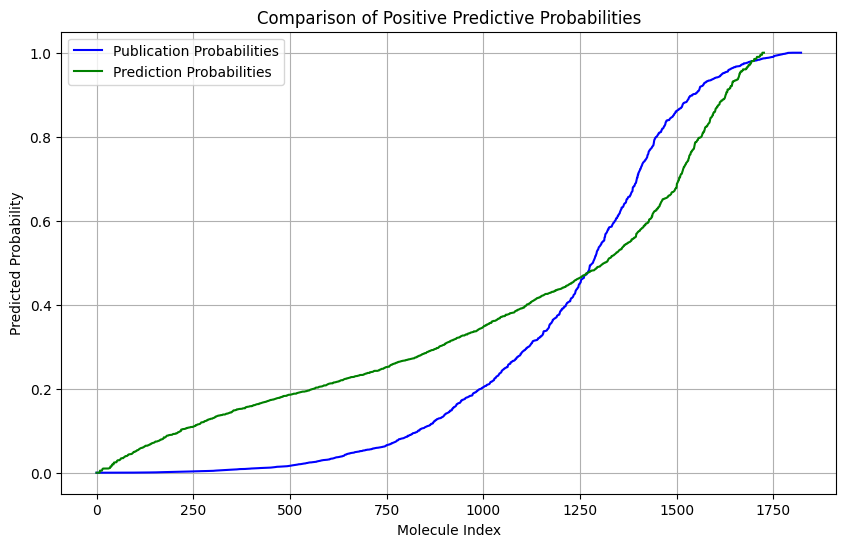

In [17]:
publication_probabilities_sorted = df_publication['Predicted positive probability'].sort_values().reset_index(drop=True)
prediction_probabilities_sorted = df_predicted['Predicted positive probability'].sort_values().reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(publication_probabilities_sorted, label='Publication Probabilities', color='blue')
plt.plot(prediction_probabilities_sorted, label='Prediction Probabilities', color='green')
plt.title('Comparison of Positive Predictive Probabilities')
plt.xlabel('Molecule Index')
plt.ylabel('Predicted Probability')
plt.legend()
plt.grid(True)
#Save the plot
figure_path = '../figures/comparison_of_predicted_positive_probabilities.png'
plt.savefig(figure_path)
plt.show()

## Comparison of predicted negative probabilities

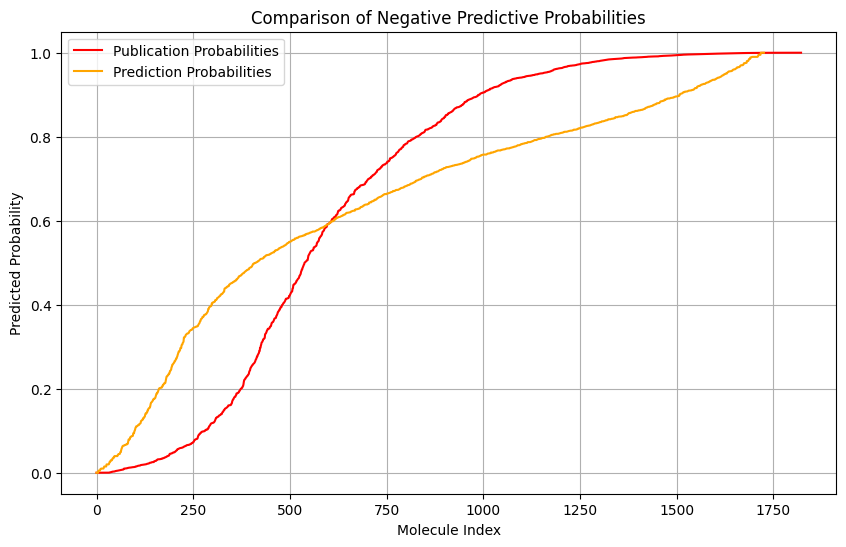

In [18]:
publication_probabilities_sorted = df_publication['Predicted negative probability'].sort_values().reset_index(drop=True)
prediction_probabilities_sorted = df_predicted['Predicted negative probability'].sort_values().reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(publication_probabilities_sorted, label='Publication Probabilities', color='red')
plt.plot(prediction_probabilities_sorted, label='Prediction Probabilities', color='orange')
plt.title('Comparison of Negative Predictive Probabilities')
plt.xlabel('Molecule Index')
plt.ylabel('Predicted Probability')
plt.legend()
plt.grid(True)
#Save the plot
figure_path = '../figures/comparison_of_predicted_negative_probabilities.png'
plt.savefig(figure_path)
plt.show()

## Comparison of percentage of blockers

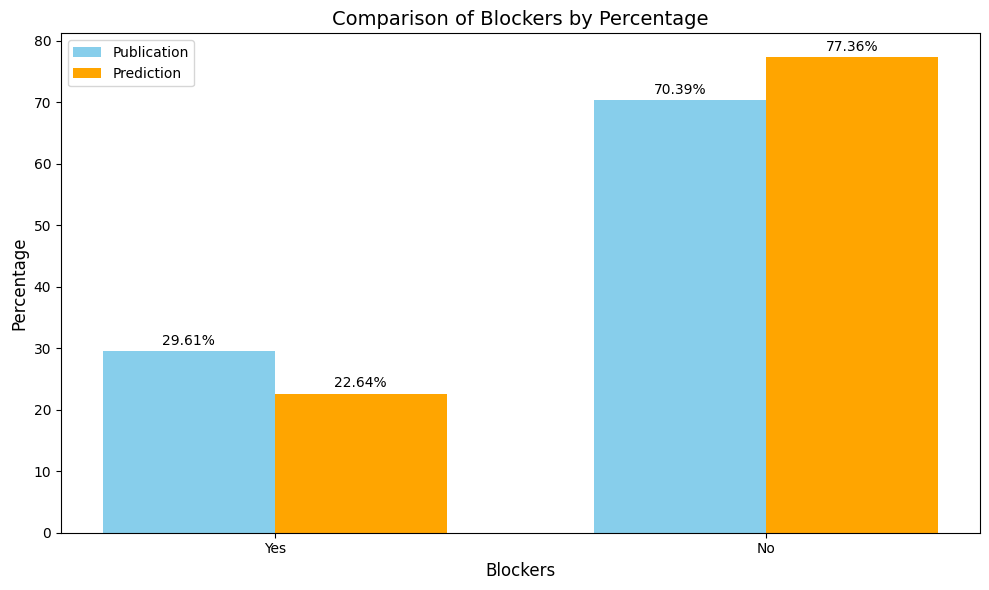

In [19]:
# Data
blockers = ['Yes', 'No']
publication_numbers = [540, 1284]
prediction_numbers = [413, 1411]
publication_percentages = [29.61, 70.39]
prediction_percentages = [22.64, 77.36]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars
bar_width = 0.35
x = range(len(blockers))
ax.bar(x, publication_percentages, width=bar_width, label='Publication', color='skyblue')
ax.bar([i + bar_width for i in x], prediction_percentages, width=bar_width, label='Prediction', color='orange')

# Annotating percentages
for i in range(len(blockers)):
    ax.text(i, publication_percentages[i] + 1, f'{publication_percentages[i]:.2f}%', ha='center', color='black', fontsize=10)
    ax.text(i + bar_width, prediction_percentages[i] + 1, f'{prediction_percentages[i]:.2f}%', ha='center', color='black', fontsize=10)

# Customizing plot
ax.set_xlabel('Blockers', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_title('Comparison of Blockers by Percentage', fontsize=14)
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(blockers)
ax.legend()

#Save the plot
figure_path = '../figures/comparison_of_percentage_of_blockers.png'
plt.savefig(figure_path)

# Show plot
plt.tight_layout()
plt.show()


**So, from the above analysis, we can conclude that the output results generated by the model from Ersilia Model Hub does not match the results of the publication. Therefore, we can say that the model `eos30gr` is not reproducible.** 